## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

## Loading the dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Define X by selecting only the age and EstimatedSalary, and y with purchased column

In [14]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
dtypes: int64(2)
memory usage: 6.4 KB


In [16]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: Purchased
Non-Null Count  Dtype
--------------  -----
400 non-null    int64
dtypes: int64(1)
memory usage: 3.3 KB


## Print count of each label in Purchased column

In [17]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Print Correlation of each feature in the dataset

In [18]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


# First: Logistic Regression model

## Split the dataset into Training set and Test set with test_size = 0.25 and random_state = 0

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Train the model with random_state = 0

In [20]:
logModel = LogisticRegression(random_state=0)

In [21]:
logModel.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Print the prediction results

In [22]:
pred = logModel.predict(X_test)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Create dataframe with the Actual Purchased and Predict Purchased

In [23]:
df_result = pd.DataFrame(y_test)
df_result['Age'] = df.loc[df_result.index, 'Age']
df_result['EstimatedSalary'] = df.loc[df_result.index, 'EstimatedSalary']
df_result = df_result[['Age', 'EstimatedSalary', 'Purchased']].rename(columns={'Purchased':'Actual_Purchased'})
df_result['Predict_Purchased'] = pred
df_result

,Age,EstimatedSalary,Actual_Purchased,Predict_Purchased
132,30,87000,0,0
309,38,50000,0,0
341,35,75000,0,0
196,30,79000,0,0
246,35,50000,0,0
...,...,...,...,...
146,27,96000,1,0
135,23,63000,0,0
390,48,33000,1,0
264,48,90000,1,0


In [24]:
ap = df_result['Actual_Purchased']
pp = df_result['Predict_Purchased']
t = 0
f = 0
for a,p in zip(ap,pp):
    if a == p:
        t += 1
    else:
        f += 1

In [25]:
print('True: ', t)
print('False: ', f)

True:  68
False:  32


In [26]:
df_result['Actual_Purchased'].value_counts()

0    68
1    32
Name: Actual_Purchased, dtype: int64

In [27]:
df_result['Predict_Purchased'].value_counts()

0    100
Name: Predict_Purchased, dtype: int64

## Print Confusion Matrix and classification_report

In [28]:
conf_matrix = confusion_matrix(y_test,pred)
conf_matrix

array([[68,  0],
       [32,  0]], dtype=int64)

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



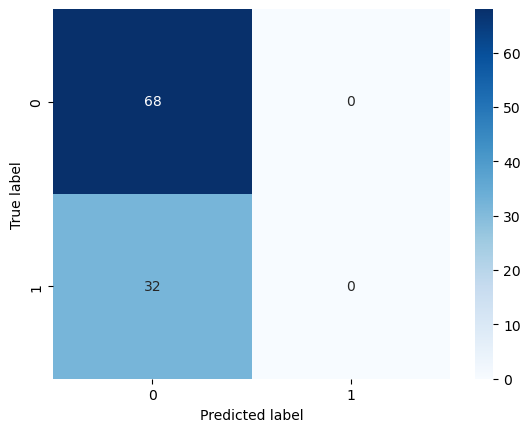

In [30]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Use StandardScaler() to improved performance and re-train your model

In [31]:
scaler = StandardScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
logModel_Scaled = LogisticRegression(random_state=0)
logModel_Scaled.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [34]:
pred_Scaled = logModel_Scaled.predict(X_test_scaled)

In [35]:
print(classification_report(y_test,pred_Scaled))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



## Try to Predicting a new result - e.g: person with Age = 30 and Salary = 90,000

In [36]:
new_data1 = pd.DataFrame({'Age': [30], 'EstimatedSalary': [90000]})
predict_new_data1 = logModel.predict(new_data1)
print(predict_new_data1)

[0]


## Try to Predicting a new result - e.g: person with Age = 40 and Salary = 90,000

In [37]:
new_data2 = pd.DataFrame({'Age': [40], 'EstimatedSalary': [90000]})
predict_new_data2 = logModel.predict(new_data2)
print(predict_new_data2)

[0]
